# Data Visualization

In [1]:
import pandas as pd
import random
import numpy

df = pd.read_excel("enhanced_synthesized_data.xlsx")

df = df[(df["Room nights"] > 0) & (df["Rooms"] > 0)]

print(df.head())

  Nationality  Rooms  Persons  Room nights  Commission %  Original amount  \
1      French      1        2            1            17            39.20   
3     Italian      1        2            2            17            70.56   
4     Italian      1        2            1            17            35.28   
5     Italian      1        2            1            17            35.28   
6     Spanish      1        4            1            17            39.69   

   Final amount  Commission amount               Property name  
1         39.20             6.6640  Dar Zakaria Toursitic Area  
3         70.56            11.9952  Dar Zakaria Toursitic Area  
4         35.28             5.9976  Dar Zakaria Toursitic Area  
5         35.28             5.9976  Dar Zakaria Toursitic Area  
6         39.69             6.7473  Dar Zakaria Toursitic Area  


/tmp/ipython-input-17-712225783.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Nationality', y='Room nights', estimator=sum, ci=None)


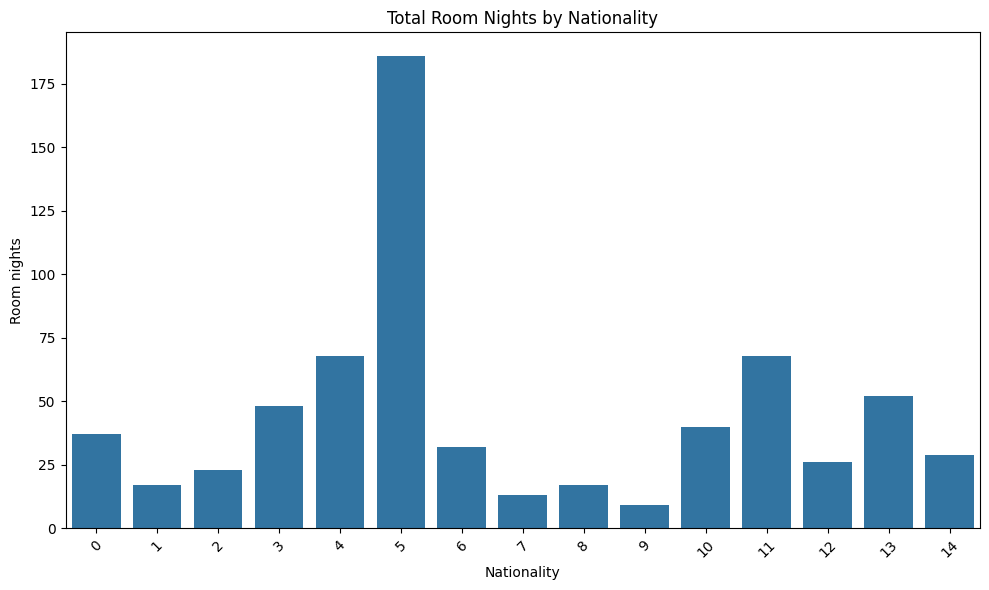

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Nationality', y='Room nights', estimator=sum, ci=None)
plt.title("Total Room Nights by Nationality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-18-626004890.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Property name', y='Final amount', estimator=sum, ci=None)


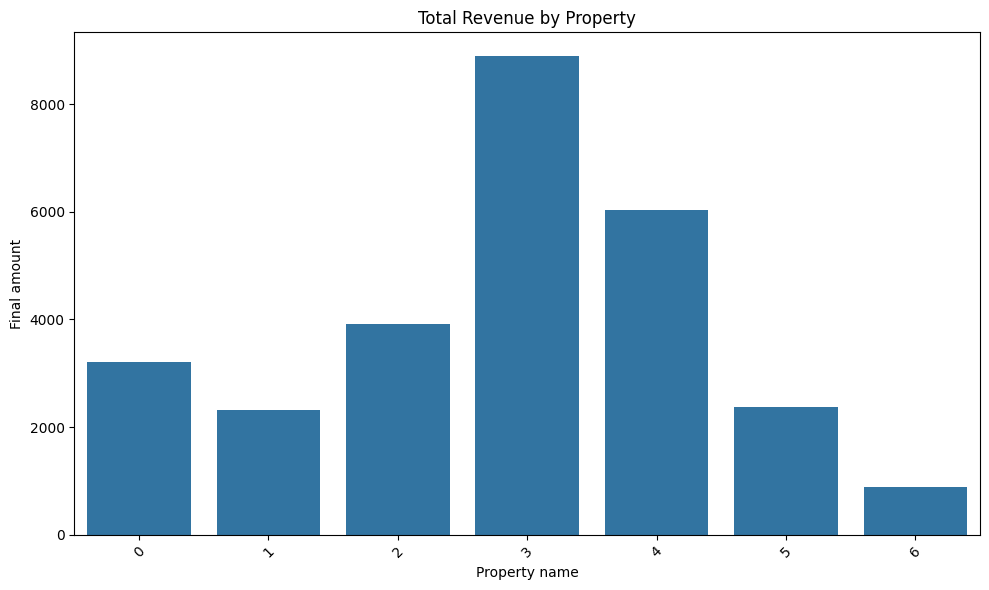

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Property name', y='Final amount', estimator=sum, ci=None)
plt.title("Total Revenue by Property")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-3772884740.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Nationality', y='Commission amount', estimator=sum, ci=None)


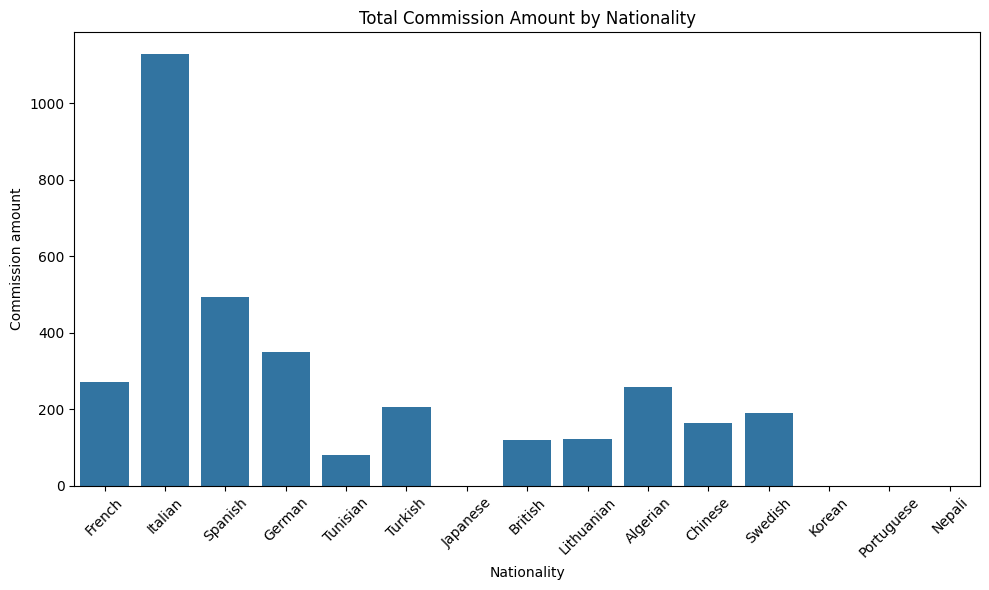

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Nationality', y='Commission amount', estimator=sum, ci=None)
plt.title("Total Commission Amount by Nationality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


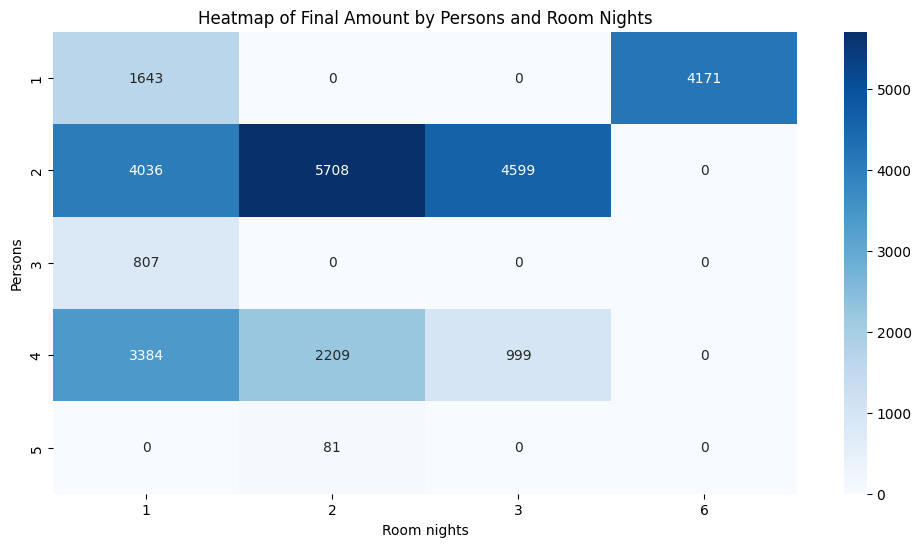

In [5]:
pivot = df.pivot_table(index='Persons', columns='Room nights', values='Final amount', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title("Heatmap of Final Amount by Persons and Room Nights")
plt.show()


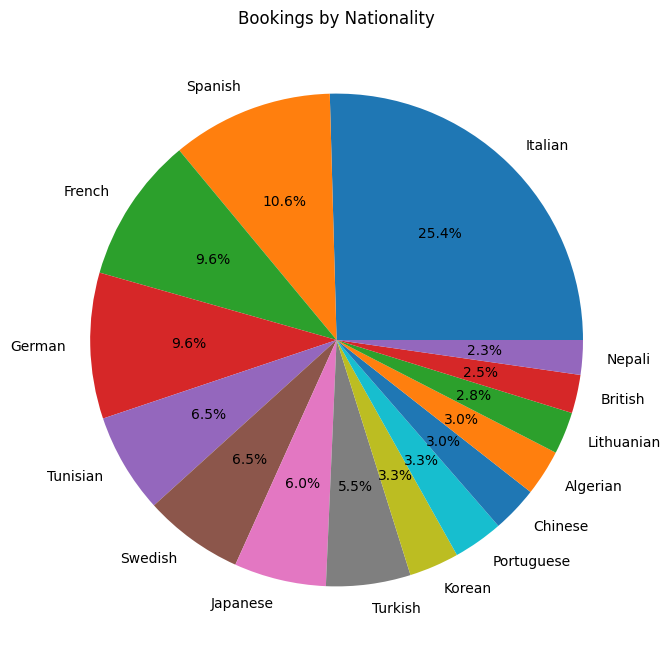

In [6]:
df_nationality = df['Nationality'].value_counts()
df_nationality.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Bookings by Nationality')
plt.ylabel('')
plt.show()


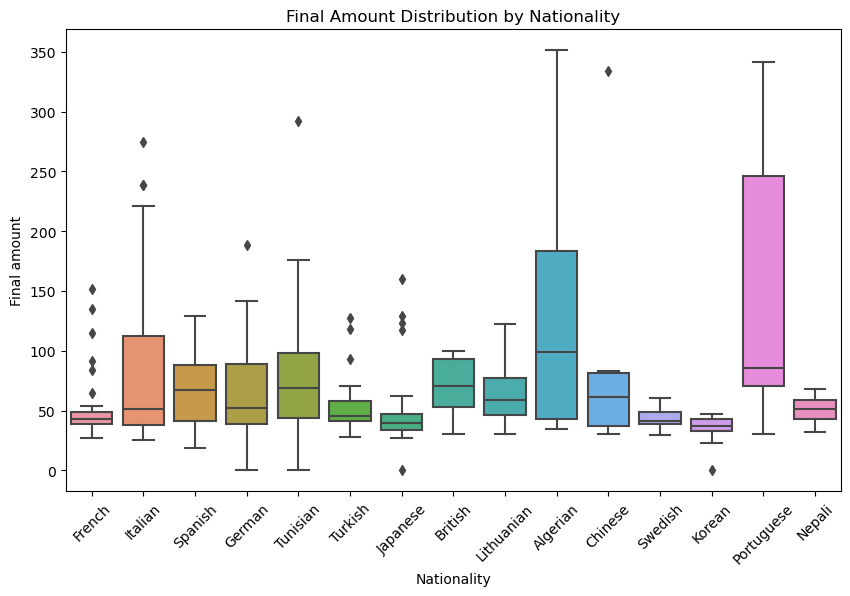

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Nationality', y='Final amount')
plt.title("Final Amount Distribution by Nationality")
plt.xticks(rotation=45)
plt.show()


C:\Users\UCS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


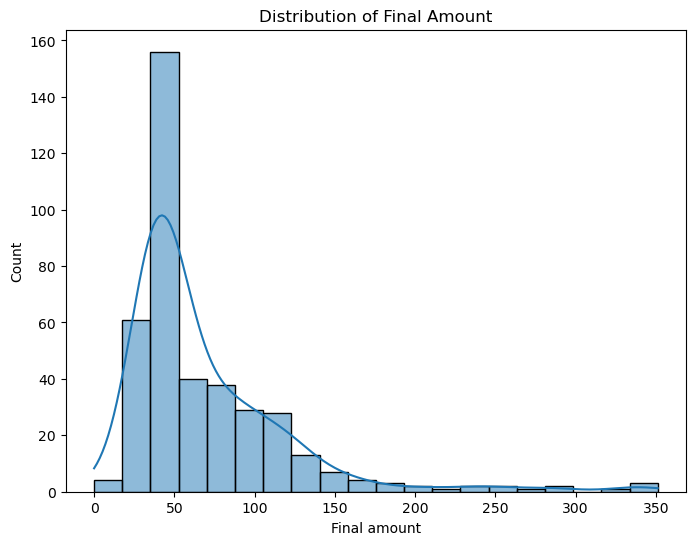

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Final amount', bins=20, kde=True)
plt.title("Distribution of Final Amount")
plt.show()


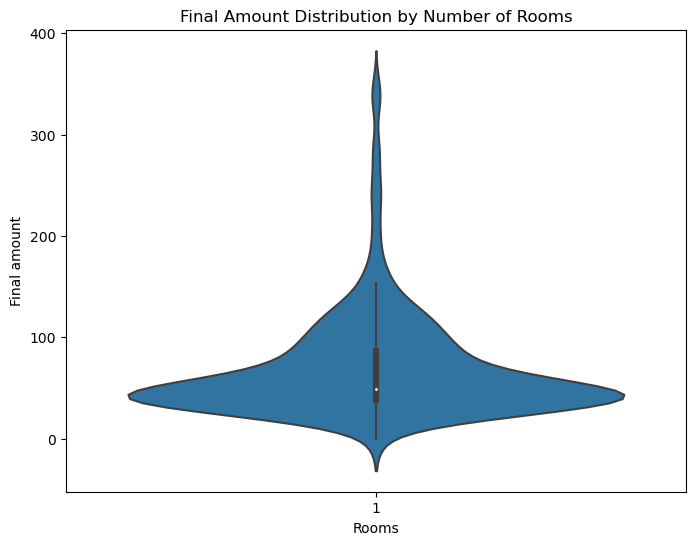

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Rooms', y='Final amount')
plt.title("Final Amount Distribution by Number of Rooms")
plt.show()


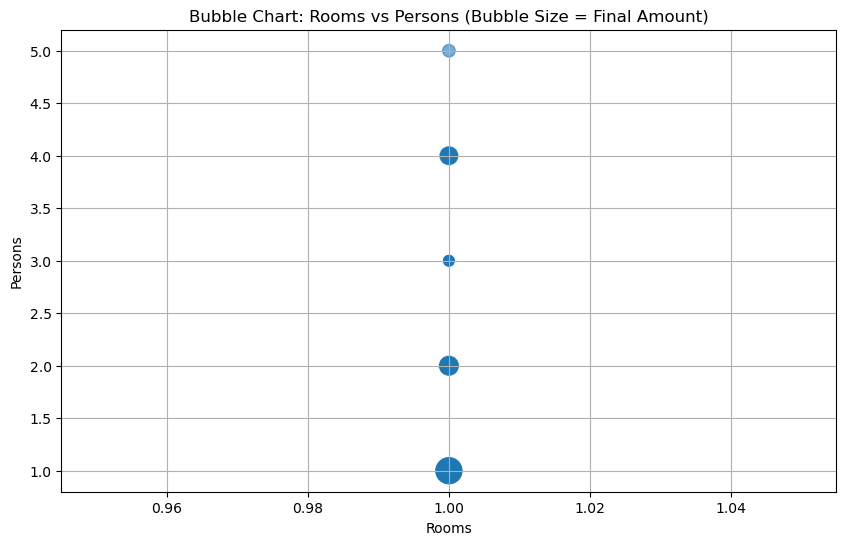

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rooms'], df['Persons'], s=df['Final amount'], alpha=0.6)
plt.xlabel('Rooms')
plt.ylabel('Persons')
plt.title('Bubble Chart: Rooms vs Persons (Bubble Size = Final Amount)')
plt.grid(True)
plt.show()


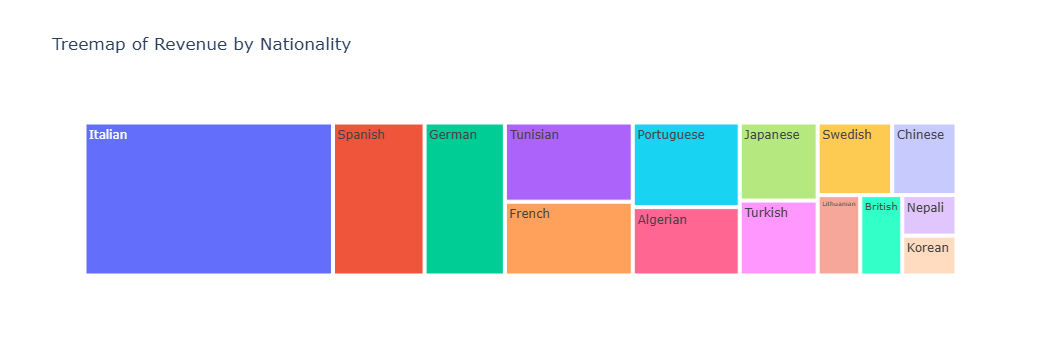

In [ ]:
import plotly.express as px

fig = px.treemap(df, path=['Nationality'], values='Final amount',
                 title='Treemap of Revenue by Nationality')
fig.show()


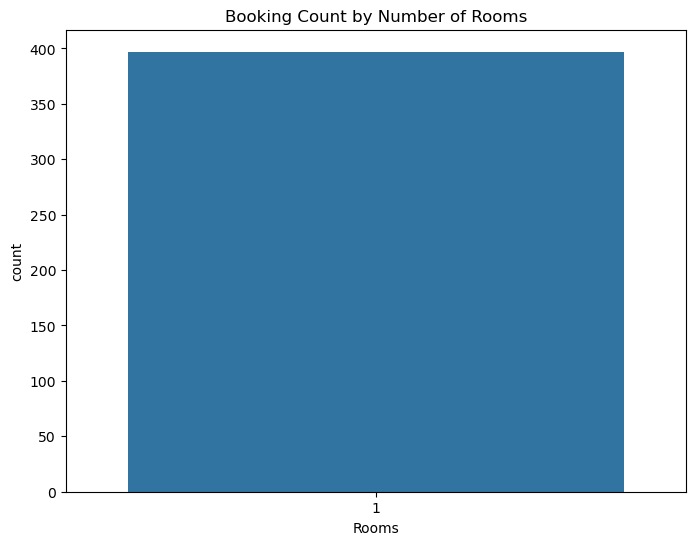

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rooms')
plt.title("Booking Count by Number of Rooms")
plt.show()


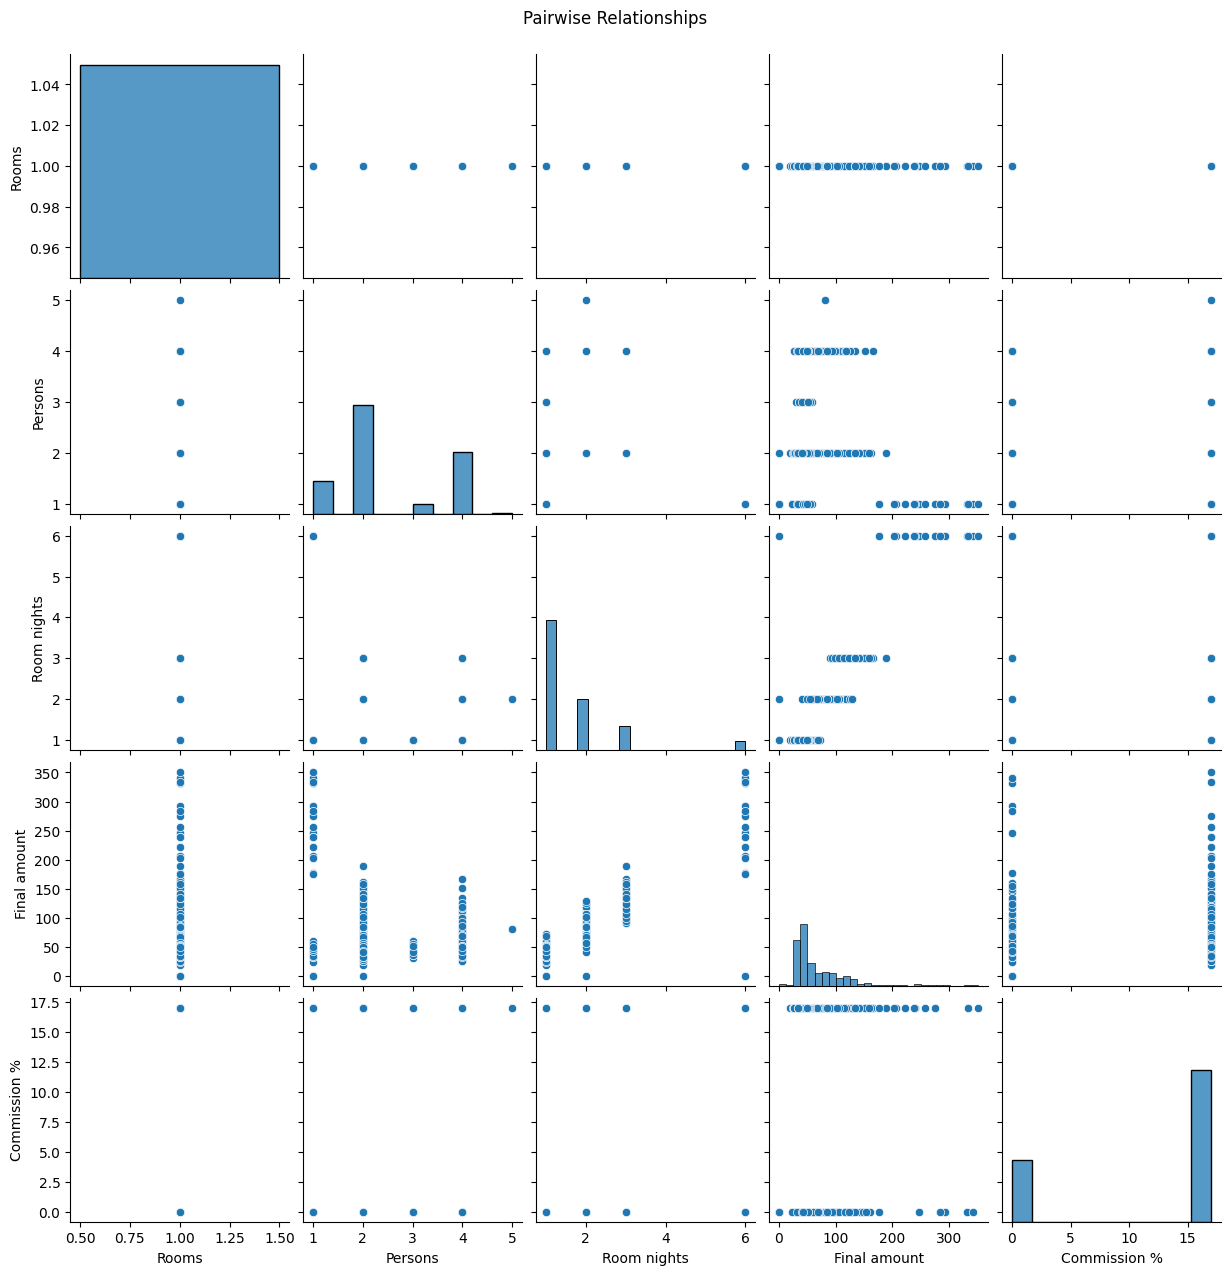

In [7]:
sns.pairplot(df[['Rooms', 'Persons', 'Room nights', 'Final amount', 'Commission %']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


C:\Users\UCS\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



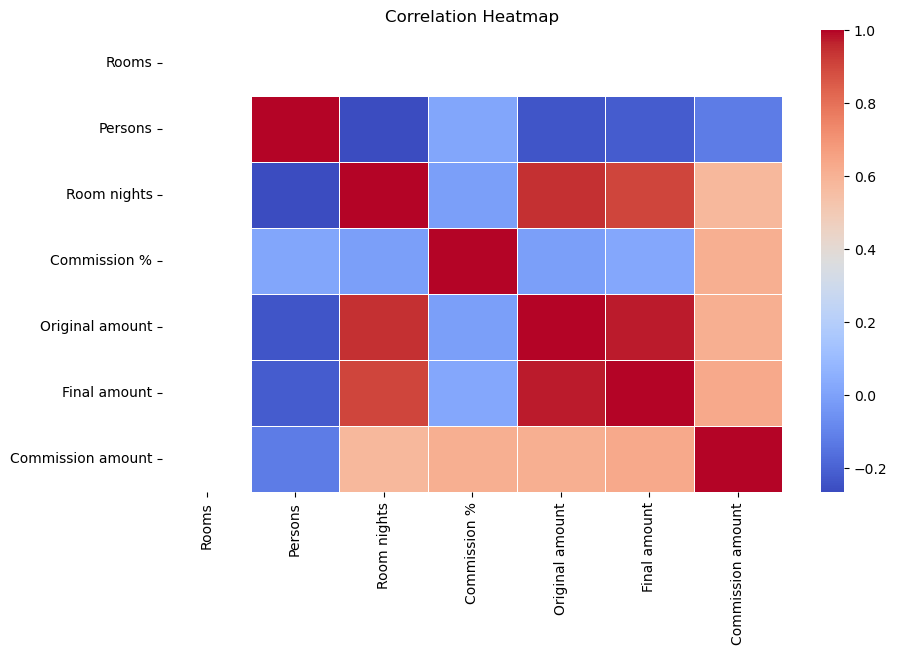

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
target = 'Final amount'
correlations = df.corr(numeric_only=True)[target].drop(target).sort_values()

plt.figure(figsize=(8, 6))
correlations.plot(kind='barh', color='skyblue')
plt.title(f"Correlation of Features with '{target}'")
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined

# ML

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import joblib
import random
import numpy

df = pd.read_excel("enhanced_synthesized_data.xlsx")

df = df[(df["Room nights"] > 0) & (df["Rooms"] > 0)].copy()

df = df[["Property name", "Nationality", "Room nights", "Final amount"]]

print(df['Property name'].unique())
print(df['Nationality'].unique())

['Dar Zakaria Toursitic Area' 'Dar Chahla' 'App s+2 RDC' 'Dar Margoum'
 'John Mark - Guesthouse' 'Suite MoonLight zone touristique tozeur'
 'Dar Beya ( APP S+2 )']
['French' 'Italian' 'Spanish' 'German' 'Tunisian' 'Turkish' 'Japanese'
 'British' 'Lithuanian' 'Algerian' 'Chinese' 'Swedish' 'Korean'
 'Portuguese' 'Nepali']


In [ ]:
df

,Property name,Nationality,Room nights,Final amount
1,Dar Zakaria Toursitic Area,French,1,39.20
3,Dar Zakaria Toursitic Area,Italian,2,70.56
4,Dar Zakaria Toursitic Area,Italian,1,35.28
5,Dar Zakaria Toursitic Area,Italian,1,35.28
6,Dar Zakaria Toursitic Area,Spanish,1,39.69
...,...,...,...,...
532,Dar Margoum,German,3,133.58
533,Dar Beya ( APP S+2 ),Italian,3,141.19
534,Dar Zakaria Toursitic Area,Italian,1,49.05
536,Dar Margoum,Tunisian,2,101.73


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import joblib
import random
import numpy

df = pd.read_excel("enhanced_synthesized_data.xlsx")

df = df[(df["Room nights"] > 0) & (df["Rooms"] > 0)].copy()

df = df[["Property name", "Nationality", "Room nights", "Final amount"]]

# Encode categorical features
le_prop = LabelEncoder()
le_nat = LabelEncoder()

df["Property name"] = le_prop.fit_transform(df["Property name"])
df["Nationality"] = le_nat.fit_transform(df["Nationality"])

X = df[["Property name", "Nationality", "Room nights"]]
y = df["Final amount"]

# Models
models = {
    "linear": LinearRegression(),
    "rf": RandomForestRegressor(n_estimators=100, random_state=42),
    "xgb": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and save
for name, model in models.items():
    model.fit(X, y)
    joblib.dump(model, f"{name}_model.pkl")

# Save encoders
joblib.dump(le_prop, "property_encoder.pkl")
joblib.dump(le_nat, "nationality_encoder.pkl")

['nationality_encoder.pkl']

# test the model on test set

In [5]:
# load the excel
test=pd.read_excel('Data Reservations.xls')

In [ ]:
test.head()

,Reservation number,Invoice number,Booked on,Arrival,Departure,Booker name,Guest name,Nationality,Rooms,Persons,...,Final amount,Commission amount,Status,Currency,Hotel id,Property name,City,Country,Rating,Review
0,4883634263,1628331529,2025-01-28T21:58:52,2025-02-28,2025-03-02,severine chossiere,severine chossiere,French,0,5,...,0.00,0.0000,CANCELLED,EUR,11407827,Dar Zakaria Toursitic Area,Tozeur,Tunisia,NaN,NaN
1,4839786233,1628331529,2025-02-24T10:12:57,2025-03-03,2025-03-04,Matthieu Triolet,Matthieu Triolet,French,1,2,...,39.20,6.6640,OK,EUR,11407827,Dar Zakaria Toursitic Area,Tozeur,Tunisia,4.0,Great spot! Perfect for young professionals. T...
2,4870644560,1628331529,2025-02-22T01:17:44,2025-03-07,2025-03-09,Sara Sinopoli,Sara Sinopoli,Italian,0,2,...,0.00,0.0000,CANCELLED,EUR,11407827,Dar Zakaria Toursitic Area,Tozeur,Tunisia,NaN,NaN
3,4875963026,1628331529,2025-01-10T11:37:42,2025-03-09,2025-03-11,Pietro Richetto,Pietro Richetto,Italian,1,2,...,70.56,11.9952,OK,EUR,11407827,Dar Zakaria Toursitic Area,Tozeur,Tunisia,3.0,It’s been a bit of a disappointment. The unit ...
4,4777408122,1628331529,2025-02-13T23:00:13,2025-03-14,2025-03-15,Anna Marinello,Anna Marinello,Italian,1,2,...,35.28,5.9976,OK,EUR,11407827,Dar Zakaria Toursitic Area,Tozeur,Tunisia,NaN,NaN


In [ ]:
test.columns

Index(['Reservation number', 'Invoice number', 'Booked on', 'Arrival',
       'Departure', 'Booker name', 'Guest name', 'Nationality', 'Rooms',
       'Persons', 'Room nights', 'Commission %', 'Original amount',
       'Final amount', 'Commission amount', 'Status', 'Currency', 'Hotel id',
       'Property name', 'City', 'Country', 'Rating', 'Review'],
      dtype='object')

In [6]:
test = test[(test["Room nights"] > 0) & (test["Rooms"] > 0)].copy()

In [ ]:
test.columns

Index(['Reservation number', 'Invoice number', 'Booked on', 'Arrival',
       'Departure', 'Booker name', 'Guest name', 'Nationality', 'Rooms',
       'Persons', 'Room nights', 'Commission %', 'Original amount',
       'Final amount', 'Commission amount', 'Status', 'Currency', 'Hotel id',
       'Property name', 'City', 'Country', 'Rating', 'Review'],
      dtype='object')

In [7]:
# Ensure the columns match training format
test = test[["Property name", "Nationality", "Room nights","Final amount"]].copy()

# Encode using the *same* LabelEncoders from training
test["Property name"] = le_prop.transform(test["Property name"])
test["Nationality"] = le_nat.transform(test["Nationality"])


In [8]:
# Prepare test features and target
X_test = test[["Property name", "Nationality", "Room nights"]]
y_test = test["Final amount"]

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [13]:
import numpy as np

In [19]:
# Model names
model_names = ["linear", "rf", "xgb"]

# Results list
results = []

# Create learning curve plots and test metrics
for name in model_names:
    model = joblib.load(f"{name}_model.pkl")

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )

    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure()
    plt.plot(train_sizes, train_rmse, label="Train RMSE")
    plt.plot(train_sizes, test_rmse, label="Validation RMSE")
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"learning_curve_{name}.png")
    plt.close()
    plt.show()

# Results DataFrame
results_df = pd.DataFrame(results)

In [20]:
results_df

,Model,MAE,MSE,RMSE,R2
0,linear,19.719414,2549.612335,50.493686,-1.160597
1,rf,12.251995,511.867918,22.624498,0.566232
2,xgb,9.084240,228.668492,15.121789,0.806221


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define threshold for binarization
threshold = 10  # Adjust this based on your data distribution

# Load models and encoders (if needed)
models = {
    "linear": joblib.load("linear_model.pkl"),
    "rf": joblib.load("rf_model.pkl"),
    "xgb": joblib.load("xgb_model.pkl")
}

# Binarize the test target
y_test_bin = (y_test > threshold).astype(int)

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Binarize predictions
    y_pred_bin = (y_pred > threshold).astype(int)

    # Create confusion matrix
    cm = confusion_matrix(y_test_bin, y_pred_bin)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.savefig(f"confusion_matrix_{name}.png")
    plt.close()
    plt.show()

# Data Synthesization


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import random

class EnhancedSyntheticDataGenerator:
    def __init__(self, df):
        self.df = df
        self.valid_data = df[(df["Room nights"] > 0) & (df["Rooms"] > 0)].copy()
        self.analyze_patterns()

    def analyze_patterns(self):
        """Analyze patterns in the original data to preserve them in synthetic data"""

        # 1. Property-specific patterns
        self.property_patterns = {}
        for prop in self.df["Property name"].unique():
            if pd.isna(prop):  # Skip NaN property names
                continue

            prop_data = self.df[self.df["Property name"] == prop]
            valid_prop_data = prop_data[(prop_data["Room nights"] > 0) & (prop_data["Rooms"] > 0)]

            # Calculate base price safely
            if len(valid_prop_data) > 0:
                price_per_night = valid_prop_data["Original amount"] / (valid_prop_data["Room nights"] * valid_prop_data["Rooms"])
                base_price = price_per_night.mean()
                price_std = valid_prop_data["Original amount"].std()
            else:
                base_price = 50
                price_std = 10

            self.property_patterns[prop] = {
                'base_price': base_price,
                'price_std': price_std if not pd.isna(price_std) else 10,
                'room_nights_dist': prop_data["Room nights"].value_counts(normalize=True).to_dict(),
                'rooms_dist': prop_data["Rooms"].value_counts(normalize=True).to_dict(),
                'persons_dist': prop_data["Persons"].value_counts(normalize=True).to_dict(),
                'commission_dist': prop_data["Commission %"].value_counts(normalize=True).to_dict(),
                'nationality_dist': prop_data["Nationality"].dropna().value_counts(normalize=True).to_dict(),
                'cancellation_rate': (prop_data["Rooms"] == 0).mean()
            }

        # 2. Cross-feature correlations
        self.analyze_correlations()

        # 3. Global distributions for fallback
        self.global_patterns = {
            'room_nights_dist': self.df["Room nights"].value_counts(normalize=True).to_dict(),
            'rooms_dist': self.df["Rooms"].value_counts(normalize=True).to_dict(),
            'persons_dist': self.df["Persons"].value_counts(normalize=True).to_dict(),
            'commission_dist': self.df["Commission %"].value_counts(normalize=True).to_dict(),
            'nationality_dist': self.df["Nationality"].dropna().value_counts(normalize=True).to_dict()
        }

    def analyze_correlations(self):
        """Analyze correlations between features"""
        # Persons vs Room nights correlation
        self.persons_room_nights_corr = {}
        for rn in self.df["Room nights"].unique():
            if pd.isna(rn):
                continue
            rn_data = self.df[self.df["Room nights"] == rn]
            if len(rn_data) > 0:
                self.persons_room_nights_corr[rn] = rn_data["Persons"].value_counts(normalize=True).to_dict()

        # Commission vs Nationality patterns
        self.commission_nationality_patterns = {}
        for nat in self.df["Nationality"].dropna().unique():
            nat_data = self.df[self.df["Nationality"] == nat]
            if len(nat_data) > 0:
                self.commission_nationality_patterns[nat] = nat_data["Commission %"].value_counts(normalize=True).to_dict()

    def weighted_choice(self, choices_dict, default_value=None):
        """Make a weighted random choice from a distribution dictionary"""
        if not choices_dict:
            return default_value

        choices = list(choices_dict.keys())
        weights = list(choices_dict.values())

        # Normalize weights to ensure they sum to 1
        weights = np.array(weights)
        weights = weights / weights.sum()

        return np.random.choice(choices, p=weights)

    def generate_correlated_persons(self, room_nights, rooms):
        """Generate persons count correlated with room nights and rooms"""
        if room_nights in self.persons_room_nights_corr:
            persons = self.weighted_choice(self.persons_room_nights_corr[room_nights], default_value=2)
        else:
            persons = self.weighted_choice(self.global_patterns['persons_dist'], default_value=2)

        # Ensure logical consistency (persons should be reasonable for rooms)
        if rooms > 0:
            max_reasonable_persons = rooms * 4  # Assume max 4 persons per room
            persons = min(persons, max_reasonable_persons)

        return max(1, persons)  # At least 1 person

    def generate_commission_for_nationality(self, nationality, property_name):
        """Generate commission based on nationality patterns and property"""
        # First try nationality-specific patterns
        if nationality in self.commission_nationality_patterns:
            commission = self.weighted_choice(self.commission_nationality_patterns[nationality])
        # Then try property-specific patterns
        elif property_name in self.property_patterns:
            commission = self.weighted_choice(self.property_patterns[property_name]['commission_dist'])
        # Finally use global patterns
        else:
            commission = self.weighted_choice(self.global_patterns['commission_dist'], default_value=0.0)

        return commission

    def calculate_realistic_price(self, property_name, room_nights, rooms, base_variation=0.15):
        """Calculate realistic price with variations"""
        if property_name not in self.property_patterns:
            base_price = 45  # Default base price
            std_dev = 10
        else:
            base_price = self.property_patterns[property_name]['base_price']
            std_dev = self.property_patterns[property_name]['price_std']

        # Add realistic variations
        seasonal_factor = np.random.uniform(0.8, 1.3)  # Seasonal pricing
        demand_factor = np.random.uniform(0.9, 1.2)    # Demand-based pricing
        random_variation = np.random.normal(1.0, base_variation)  # Random variation

        price_per_night_per_room = base_price * seasonal_factor * demand_factor * random_variation
        total_price = price_per_night_per_room * room_nights * rooms

        return round(max(10, total_price), 2)  # Minimum price of 10

    def generate_synthetic_row(self):
        """Generate a single synthetic row preserving patterns"""

        # 1. Select property (can be weighted by frequency)
        property_name = self.weighted_choice(
            {k: len(self.df[self.df["Property name"] == k]) for k in self.df["Property name"].unique()}
        )

        # 2. Determine if this is a cancellation
        is_cancellation = np.random.random() < self.property_patterns[property_name]['cancellation_rate']

        if is_cancellation:
            rooms = 0
            room_nights = self.weighted_choice(self.property_patterns[property_name]['room_nights_dist'], 0)
            persons = self.weighted_choice(self.property_patterns[property_name]['persons_dist'], 2)

            # Cancelled bookings still have original amounts but 0 final amounts
            original_amount = round(np.random.uniform(30, 150), 2)
            final_amount = 0.0
            commission_amount = 0.0
            commission_percent = 0.0
        else:
            # 3. Generate rooms and room nights from property patterns
            rooms = max(1, int(self.weighted_choice(self.property_patterns[property_name]['rooms_dist'], 1)))
            room_nights = max(1, int(self.weighted_choice(self.property_patterns[property_name]['room_nights_dist'], 1)))

            # 4. Generate correlated persons count
            persons = self.generate_correlated_persons(room_nights, rooms)

            # 5. Calculate realistic pricing
            original_amount = self.calculate_realistic_price(property_name, room_nights, rooms)
            final_amount = original_amount

        # 6. Select nationality (property-specific preference)
        nationality = self.weighted_choice(
            self.property_patterns[property_name]['nationality_dist'],
            default_value=self.weighted_choice(self.global_patterns['nationality_dist'])
        )

        # 7. Generate commission based on patterns
        if not is_cancellation:
            commission_percent = self.generate_commission_for_nationality(nationality, property_name)
            commission_amount = round(final_amount * commission_percent / 100, 4)

        return {
            "Nationality": nationality,
            "Rooms": rooms,
            "Persons": persons,
            "Room nights": room_nights,
            "Commission %": commission_percent,
            "Original amount": original_amount,
            "Final amount": final_amount,
            "Commission amount": commission_amount,
            "Property name": property_name
        }

    def generate_synthetic_data(self, n_samples=500):
        """Generate n synthetic samples"""
        synthetic_rows = []
        for _ in range(n_samples):
            synthetic_rows.append(self.generate_synthetic_row())

        return pd.DataFrame(synthetic_rows)

    def validate_synthetic_data(self, synthetic_df):
        """Validate that synthetic data preserves key patterns"""
        print("=== VALIDATION REPORT ===")
        print(f"Original data shape: {self.df.shape}")
        print(f"Synthetic data shape: {synthetic_df.shape}")
        print()

        # Compare key statistics
        for column in ['Rooms', 'Persons', 'Room nights', 'Commission %']:
            if column in self.df.columns and column in synthetic_df.columns:
                orig_mean = self.df[column].mean()
                synth_mean = synthetic_df[column].mean()
                print(f"{column} - Original mean: {orig_mean:.2f}, Synthetic mean: {synth_mean:.2f}")

        print()
        print("Cancellation rates:")
        orig_cancel_rate = (self.df['Rooms'] == 0).mean()
        synth_cancel_rate = (synthetic_df['Rooms'] == 0).mean()
        print(f"Original: {orig_cancel_rate:.3f}, Synthetic: {synth_cancel_rate:.3f}")

        print()
        print("Property distribution comparison:")
        orig_prop_dist = self.df['Property name'].value_counts(normalize=True).head()
        synth_prop_dist = synthetic_df['Property name'].value_counts(normalize=True).head()

        for prop in orig_prop_dist.index[:3]:
            orig_pct = orig_prop_dist[prop]
            synth_pct = synth_prop_dist.get(prop, 0)
            print(f"{prop}: Original {orig_pct:.3f}, Synthetic {synth_pct:.3f}")

# Usage example:
def main():
    # Load your data
    df = pd.read_excel("/content/Data Reservations.xlsx")

    # Create generator
    generator = EnhancedSyntheticDataGenerator(df)

    # Generate synthetic data
    synthetic_df = generator.generate_synthetic_data(n_samples=500)

    # Validate
    generator.validate_synthetic_data(synthetic_df)

    # Combine with original data
    combined_df = pd.concat([df, synthetic_df], ignore_index=True)

    # Save
    combined_df.to_excel("enhanced_synthesized_data.xlsx", index=False)
    print(f"\nTotal combined rows: {combined_df.shape[0]}")

    return combined_df

# Run the enhanced generator
if __name__ == "__main__":
    combined_df = main()